# <span style="color:#9c8f8f"> 75.06/95.58 Organización de Datos</span>
# <span style="color:#9c8f8f"> Análisis exploratorio: Real or Not? NLP with Disaster Tweets</span>

# <center>FEATURE ENGINEERING</center>
# <center>Decision trees</center>

In [1]:
# Cargo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# Cargo train and test

dtype_train = {"id": np.int32, "keyword": "category", "target" : int}
train = pd.read_csv("original_data/train.csv", dtype = dtype_train, encoding='UTF_8')

In [3]:
# Creo dataframe con target

target_train = train[["id","target"]]

In [4]:
DIR_CSV = "features/"

# Understanding decision trees

* In the decision tree chart, each internal node has a decision rule that splits the data.

* Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

* There is no need to normalize columns.

# Auxiliar Functions

In [5]:
def decision_tree_feature_search(X,y,m):
    
    # Model creation
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X, y)
    
    # Feature importance

    feature_importances = clf.feature_importances_

    # get index of m most important features sorted

    m_index = np.argpartition(feature_importances, -m)[-m:]
    m_index = m_index[np.argsort(feature_importances[m_index])][::-1]
    
    # Get the m most important features of locations

    m_feature_importances = feature_importances[m_index]
    
    # Get m feature name
    
    m_feature_name = X.columns[m_index]
    
    return feature_importances, m_index, m_feature_importances, m_feature_name

In [6]:
def plot_decision_tree(X,y,depth):
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf= clf.fit(X, y)

    plt.figure(1, figsize=(10,10))
    tree.plot_tree(clf, filled=True)
    
    plt.show()

In [7]:
def print_feature_search(feature, importance):
    print("{: >20} {: >20}\n".format("feature","importance"))
    for i in range(len(feature)):
        print("{: >20}\t\t{: >20}".format(feature[i],importance[i]))

# Desition trees

## 1. Keywords

## 2. Text 

## 3. Locations

### 3.1 features_location_bow

In [8]:
# cargo archivo

df_location_bow = pd.read_csv(DIR_CSV + 'train/features_location_bow.csv', low_memory=False)
display(df_location_bow.head(1))

,Unnamed: 0,index,ae,af,aq,ar,at,au,bb,bd,...,th,tm,ua,ug,us,uy,ve,vn,za,zw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# relaciono target con df segun id
target_train.columns = ["index", "target"]
df_location_bow = df_location_bow.merge(target_train, how="inner", on="index")
target_train.columns = ["id", "target"]

In [10]:
X = df_location_bow.loc[:,"ae":"zw"]
y = df_location_bow["target"]

In [11]:
# Aplico desition tree

feature_importances_location_bow, m_index_location_bow, m_feature_importances_location_bow, m_feature_name_location_bow= decision_tree_feature_search(X,y,10)

In [12]:
# Imprimo informacion

print_feature_search(m_feature_name_location_bow, m_feature_importances_location_bow)

             feature           importance

                  in		 0.10522299225409869
                  ie		 0.05680813954958134
                  de		0.040841763722602356
                  it		0.031441579267973946
                  pt		0.028441408950222496
                  ph		 0.02705948633260172
                  be		0.026710811645944566
                  kr		 0.02669027276733679
                  vn		 0.02666975756920596
                  ke		 0.02511720166680615


### 3.2 features_location_tf_idf

In [13]:
# cargo archivo

df_location_tf_idf = pd.read_csv(DIR_CSV + 'train/features_location_tf_idf.csv', low_memory=False)
display(df_location_tf_idf.head(1))

,Unnamed: 0,index,ae,af,aq,ar,au,bb,bd,bg,...,sy,th,tm,ua,ug,uy,ve,vn,za,zw
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# relaciono target con df segun id

target_train.columns = ["index", "target"]
df_location_tf_idf = df_location_tf_idf.merge(target_train, how="inner", on="index")
target_train.columns = ["id", "target"]

In [15]:
# Separo mi data

X = df_location_tf_idf.loc[:,"ae":"zw"]
y = df_location_tf_idf["target"]

In [16]:
# Aplico desition tree

feature_importances_location_tf_idf, m_index_location_tf_idf, m_feature_importances_location_tf_idf, m_feature_name_location_tf_idf = decision_tree_feature_search(X,y,10)

In [17]:
# Imprimo informacion

print_feature_search(m_feature_name_location_tf_idf, m_feature_importances_location_tf_idf)

             feature           importance

                  ph		 0.04778698660746674
                  pt		0.042575290368288894
                  vn		 0.03939884576621379
                  kr		0.039369177960667405
                  ke		0.036450505928962304
                  pk		0.035618191827850164
                  ne		  0.0336466235311834
                  gh		  0.0319556673084336
                  ro		 0.03033068223549692
                  br		0.029780270031984447


In [18]:
# locations in common location_bow and location_tf_idf m most important features

location_in_common = []
for e in m_feature_name_location_bow:
    if e in m_feature_name_location_tf_idf:
        location_in_common.append(e)
        
location_in_common

['pt', 'ph', 'kr', 'vn', 'ke']

### 3.3 features_location_numerical

In [19]:
# cargo archivo

df_location_numerical = pd.read_csv(DIR_CSV + 'train/features_location_numerical.csv', low_memory=False)
display(df_location_numerical.head(1))

,Unnamed: 0,id,target,has_country,has_city,has_county,has_state,has_continent
0,0,1,1,0,0,0,0,0


In [20]:
# Separo mi data

X = df_location_numerical.loc[:,"has_country":"has_continent"]
y = df_location_numerical["target"]

In [21]:
# Aplico desition tree

feature_importances_location_numerical, m_index_location_numerical, m_feature_importances_location_numerical, m_feature_name_location_numerical = decision_tree_feature_search(X,y,5)

In [22]:
# Imprimo informacion

print_feature_search(m_feature_name_location_numerical, m_feature_importances_location_numerical)

             feature           importance

       has_continent		  0.4201219975712411
            has_city		  0.3638730453189099
          has_county		 0.09863419218254829
           has_state		 0.08259389943509134
         has_country		 0.03477686549220937


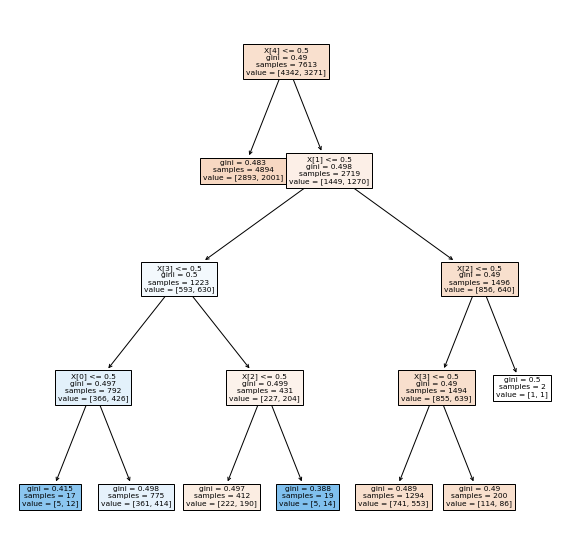

In [23]:
plot_decision_tree(X,y,5)

### 3.4 features_location_in_text_numerical

In [24]:
# cargo archivo

df_location_in_text_numerical = pd.read_csv(DIR_CSV + 'train/features_location_in_text_numerical.csv', low_memory=False)
display(df_location_in_text_numerical.head(2))

,Unnamed: 0,id,target,has_country,has_city,has_county,has_state,has_continent
0,0,1,NaN,0,0,0,0,0
1,1,4,NaN,1,0,0,0,1


In [25]:
# Agrego target mal guardado en csv

del df_location_in_text_numerical["target"]
df_location_in_text_numerical = df_location_in_text_numerical.merge(target_train, how="inner", on="id")

In [26]:
# Separo mi data

X = df_location_in_text_numerical.loc[:,"has_country":"has_continent"]
y = df_location_in_text_numerical["target"]

In [27]:
# Aplico desition tree

feature_importances_location_in_text_numerical, m_index_location_in_text_numerical, m_feature_importances_location_numerical, m_feature_name_location_in_text_numerical = decision_tree_feature_search(X,y,5)

In [28]:
# Imprimo informacion

print_feature_search(m_feature_name_location_in_text_numerical, m_feature_importances_location_numerical)

             feature           importance

       has_continent		  0.9667359633952927
            has_city		0.019875124620939873
           has_state		0.010282301066125318
         has_country		0.0028974921773544946
          has_county		0.00020911874028769554


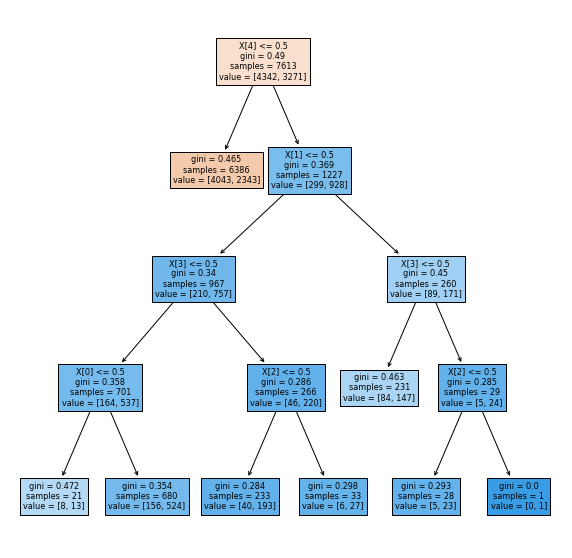

In [29]:
plot_decision_tree(X,y,5)